In [ ]:
import zipfile, os
import glob
import cv2
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/My Drive/Semester2/ComputerVision/Dataset.zip"


Mounted at /content/drive


In [ ]:
data_zip = "/content/drive/My Drive/Semester2/ComputerVision/Dataset.zip"
dataset = "/content/drive/My Drive/Semester2/ComputerVision/Dataset"

# ekstrak zip utama
with zipfile.ZipFile(data_zip, 'r') as zip_ref:
    zip_ref.extractall(dataset)

print("Isi folder Dataset:", os.listdir(dataset))

Isi folder Dataset: ['2d_images.zip', '2d_images_extracted']


In [ ]:
zip_path2 = os.path.join(dataset, "2d_images.zip")
extract_path2 = os.path.join(dataset, "2d_images_extracted")

with zipfile.ZipFile(zip_path2, 'r') as zip_ref:
    zip_ref.extractall(extract_path2)

print("Isi folder 2d_images_extracted:", os.listdir(extract_path2)[:10])

Isi folder 2d_images_extracted: ['results_hist_eq', 'results_clahe', 'ID_0000_Z_0142.tif', 'ID_0003_Z_0132.tif', 'ID_0004_Z_0066.tif', 'ID_0001_Z_0146.tif', 'ID_0008_Z_0065.tif', 'ID_0005_Z_0066.tif', 'ID_0006_Z_0206.tif', 'ID_0002_Z_0162.tif']


Total gambar: 801


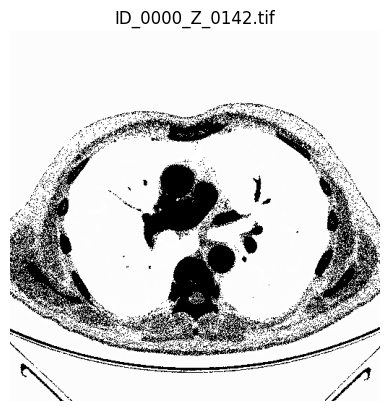

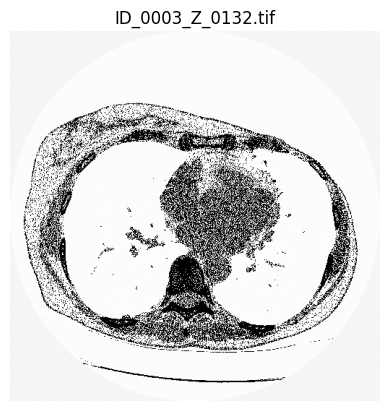

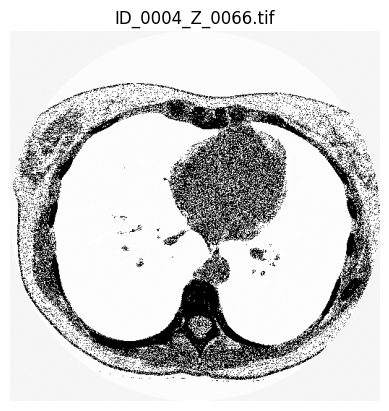

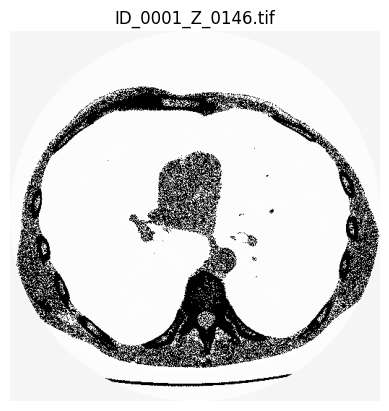

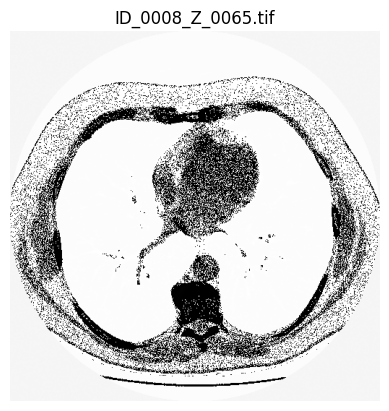

In [ ]:
img_paths = glob.glob(os.path.join(extract_path2, "**", "*.*"), recursive=True)
print("Total gambar:", len(img_paths))

for path in img_paths[:5]:
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    plt.imshow(img, cmap="gray")
    plt.title(os.path.basename(path))
    plt.axis("off")
    plt.show()

In [ ]:
output_hist = os.path.join(extract_path2, "results_hist_eq")
output_clahe = os.path.join(extract_path2, "results_clahe")
os.makedirs(output_hist, exist_ok=True)
os.makedirs(output_clahe, exist_ok=True)

In [ ]:
# Buat objek CLAHE sekali saja
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))


In [ ]:
for path in img_paths:
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        continue

    # Histogram Equalization
    hist_eq = cv2.equalizeHist(img)

    # CLAHE
    clahe_eq = clahe.apply(img)

    # Simpan hasil
    filename = os.path.basename(path)
    cv2.imwrite(os.path.join(output_hist, filename), hist_eq)
    cv2.imwrite(os.path.join(output_clahe, filename), clahe_eq)

print(f"Selesai! Hasil tersimpan di:\n- {output_hist}\n- {output_clahe}")

Selesai! Hasil tersimpan di:
- /content/drive/My Drive/Semester2/ComputerVision/Dataset/2d_images_extracted/results_hist_eq
- /content/drive/My Drive/Semester2/ComputerVision/Dataset/2d_images_extracted/results_clahe


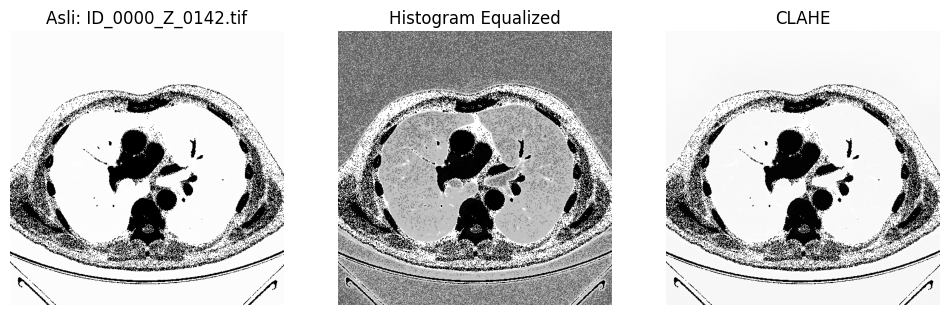

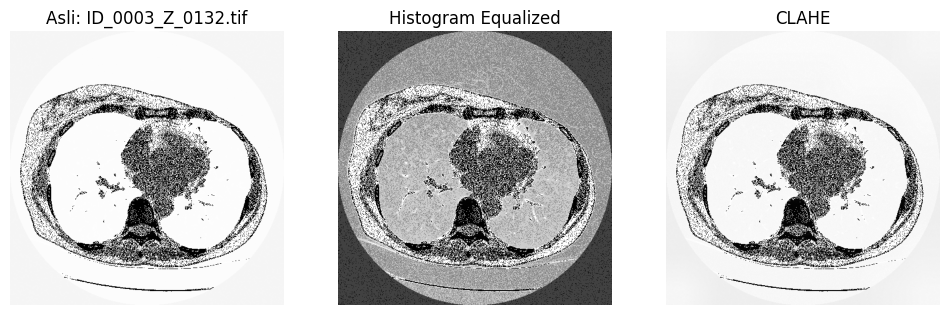

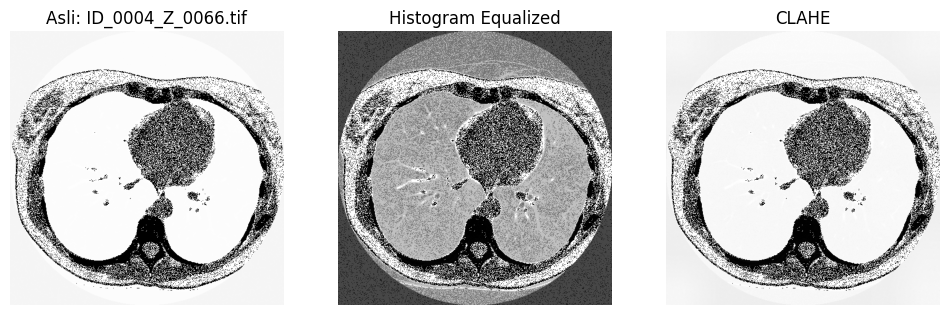

In [ ]:
for path in img_paths[:3]:
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    hist_eq = cv2.equalizeHist(img)
    clahe_eq = clahe.apply(img)

    plt.figure(figsize=(12,4))

    plt.subplot(1,3,1)
    plt.imshow(img, cmap="gray")
    plt.title("Asli: " + os.path.basename(path))
    plt.axis("off")

    plt.subplot(1,3,2)
    plt.imshow(hist_eq, cmap="gray")
    plt.title("Histogram Equalized")
    plt.axis("off")

    plt.subplot(1,3,3)
    plt.imshow(clahe_eq, cmap="gray")
    plt.title("CLAHE")
    plt.axis("off")

    plt.show()
